# ETL com Python e Pandas - Transformando Dados de Contratos em Informações Valiosas

**Contexto do Problema**: Imagine que somos consultores de dados para uma empresa que lida com muitos contratos. Atualmente, as informações sobre esses contratos estão espalhadas em diferentes "sistemas" (para simplificar, vamos usar arquivos CSV que simulam essas diferentes fontes de dados).

**Temos**:  
* Uma tabela com os detalhes dos contratos (ID do contrato, nome, objeto, valor e IDs genéricos para início e término de vigência, e um ID para a empresa contratada).
* Uma tabela com os dados das empresas contratadas (ID da empresa e nome).
* E uma tabela de "datas", que contém IDs numéricos e suas respectivas datas reais.

**O Grande Desafio**: Com os dados assim, é impossível responder a perguntas de negócio importantes, como:

* Qual o valor total de contratos por empresa?
* Qual a duração real de cada contrato?
* Quais tipos de serviços (objeto do contrato) são mais contratados?

**Objetivo da Aula**:

* Compreender o conceito e a importância do ETL no dia a dia das empresas.
* Extrair dados de múltiplas fontes (arquivos CSV, simulando sistemas reais).
* Realizar transformações essenciais: limpeza, combinação (joins/merges) e criação de novas métricas.
* Carregar os dados transformados, deixando-os prontos para análise e visualização em ferramentas de Business Intelligence.
* Ter um projeto ETL real e aplicável, que pode ser o ponto de partida para suas primeiras análises de dados ou até mesmo para oportunidades de freelance!

# Configuração do Ambiente e Importação de Bibliotecas

* Antes de começarmos a manipular qualquer dado, precisamos garantir que nosso ambiente de trabalho está pronto.
* A principal delas será o `pandas`, essencial para trabalhar com dados tabulares.


In [1]:
!pip install -q pandas IPython


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd # A biblioteca pandas é a nossa principal ferramenta
import numpy as np
from IPython.display import Image # Image é usada para exibir imagens diretamente aqui no notebook.

In [3]:
# Acessando documentos do google drive
import google.colab.drive
google.colab.drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

# Extração de Dados (Extract)

A primeira etapa do ETL é a Extração. Vamos carregar cada um desses arquivos para um DataFrame do Pandas, que é a estrutura de dados principal que usaremos para manipular as tabelas.


In [6]:
# path_tbcontratos = "/content/drive/MyDrive/etl-python/projeto-01/dados/tabela_contratos.csv"
# path_tbdatas = "/content/drive/MyDrive/etl-python/projeto-01/dados/tabela_datas.csv"
# path_tbempresas = "/content/drive/MyDrive/etl-python/projeto-01/dados/tabela_empresas.csv"

path_tbcontratos = "./dados/tabela_contratos.csv"
path_tbdatas = "./dados/tabela_datas.csv"
path_tbempresas = "./dados/tabela_empresas.csv"

In [7]:
# Estamos lendo o arquivo 'tabela_contratos.csv' e armazenando seu conteúdo
# em um DataFrame chamado 'contratos'.
tbcontratos = pd.read_csv(path_tbcontratos)

In [8]:
tbcontratos.head()

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,inicio_vigencia,termino_vigencia,fk_empresa_contratada
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,4,32,1
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,13,33,2
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,10,33,3
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,6,33,4
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,8,35,5


In [9]:
# verificando a estrutura do dataframe
tbcontratos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_contrato            184 non-null    int64  
 1   nome_contrato          184 non-null    object 
 2   objeto_contrato        184 non-null    object 
 3   valor_contrato         184 non-null    float64
 4   inicio_vigencia        184 non-null    int64  
 5   termino_vigencia       184 non-null    int64  
 6   fk_empresa_contratada  184 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 10.2+ KB


In [10]:
# Exercício 1 - Carregar e exibir a tabela tbdatas
# Aqui você vai carregar a tabela
tbdatas = pd.read_csv(path_tbdatas)

In [11]:
# Exercício 1 - Carregar e exibir a tabela tbdatas
# Aqui você vai exibir
tbdatas.head()

,id_data,data
0,1,20/05/2014
1,2,27/09/2014
2,3,28/11/2014
3,4,20/12/2014
4,5,28/12/2014


In [12]:
# verificando a estrutura do dataframe
tbdatas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id_data  254 non-null    int64 
 1   data     254 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.1+ KB


In [13]:
# Exercício 2 - Carregar e exibir a tabela tbempresas
# Aqui você vai carregar a tabela
tbempresas = pd.read_csv(path_tbempresas)

In [14]:
# Exercício 2 - continuação
# Aqui você vai exibir
tbempresas.head()

,id_empresa,nome_empresa
0,1,Thomas Jefferson
1,2,Chaveiro City
2,3,HBL Carimbos
3,4,Claro S/A
4,5,Imprensa Nacional


In [15]:
tbempresas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_empresa    68 non-null     int64 
 1   nome_empresa  68 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


# Transformação de Dados (Transform)  

Esta é a fase mais robusta do ETL! Vamos limpar, combinar e enriquecer nossos dados. Nossos DataFrames estão separados e, em alguns casos, usam IDs para referenciar outras informações. Nosso objetivo é ter um único DataFrame contratos_final com todas as informações necessárias em um formato legível e analítico.

**Ilustração dos Tipos de JOIN (Junções)**

Para combinar tabelas, usamos operações de junção (ou JOIN, no SQL). O Pandas nos permite fazer isso com a função `merge()`.

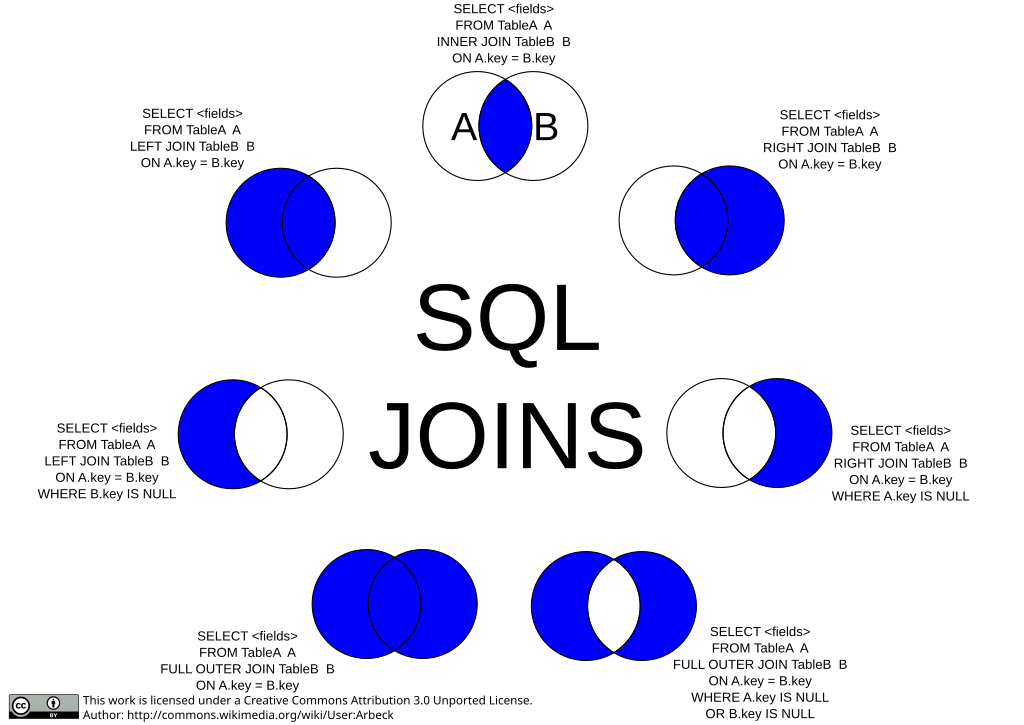

In [ ]:
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/SQL_Joins.svg/1024px-SQL_Joins.svg.png')

 * Nosso primeiro passo na transformação será combinar a tabela contratos com a tabela empresas.  
 * Atualmente, contratos possui apenas um id_empresa_contratada. Queremos substituir esse ID pelo nome_empresa real.
 * Usaremos um left merge para garantir que todos os contratos sejam mantidos, mesmo que por algum motivo uma empresa não seja encontrada na tabela_empresas.

## Combinando Contratos com Empresas (Merge)

In [16]:
# Usamos a função .merge() para combinar os DataFrames 'contratos' e 'empresas'.
# 'left_on' indica a coluna para a junção no DataFrame da esquerda ('contratos').
# 'right_on' indica a coluna para a junção no DataFrame da direita ('empresas').
# 'how='left'' significa que queremos um "Left Merge": todas as linhas do DataFrame 'contratos' (o da esquerda) serão mantidas, e as colunas correspondentes de 'empresas' serão adicionadas.
# Se não houver uma correspondência na tabela 'empresas', os valores serão preenchidos com NaN (Not a Number/Não Disponível).

contratos_mod = tbcontratos.merge(tbempresas,
                                  left_on='fk_empresa_contratada',
                                  right_on='id_empresa',
                                  how='left')


In [17]:
contratos_mod.head()

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,inicio_vigencia,termino_vigencia,fk_empresa_contratada,id_empresa,nome_empresa
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,4,32,1,1,Thomas Jefferson
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,13,33,2,2,Chaveiro City
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,10,33,3,3,HBL Carimbos
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,6,33,4,4,Claro S/A
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,8,35,5,5,Imprensa Nacional


In [ ]:
# Após a junção, as colunas 'fk_empresa_contratada' e 'id_empresa' se tornaram redundantes, pois agora temos o 'nome_empresa' diretamente associado.
# A função .drop() é usada para remover colunas. 'columns' especifica quais colunas, e 'inplace=True' modifica o DataFrame diretamente, sem a necessidade de reatribuir.

contratos_mod.drop(columns=['fk_empresa_contratada','id_empresa'], inplace=True)

In [ ]:
contratos_mod.head()

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,inicio_vigencia,termino_vigencia,nome_empresa
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,4,32,Thomas Jefferson
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,13,33,Chaveiro City
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,10,33,HBL Carimbos
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,6,33,Claro S/A
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,8,35,Imprensa Nacional


## Combinando Contratos com Datas (Início de Vigência) - Exercício

In [ ]:
# Exrcício 2 - Aqui você faz o merge
contratos_final = contratos_mod.merge(tbdatas,
                                      left_on='inicio_vigencia',
                                      right_on='id_data',
                                      how='left')

In [ ]:
# Exrcício 2 - Aqui exibe o resultado do merge
contratos_final.head()

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,inicio_vigencia,termino_vigencia,nome_empresa,id_data,data
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,4,32,Thomas Jefferson,4,20/12/2014
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,13,33,Chaveiro City,13,26/02/2015
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,10,33,HBL Carimbos,10,10/02/2015
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,6,33,Claro S/A,6,01/01/2015
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,8,35,Imprensa Nacional,8,27/01/2015


In [ ]:
# Exrcício 2 - Remove colunas
contratos_final.drop(columns=['inicio_vigencia','id_data'], inplace=True)

In [ ]:
# Exrcício 2 - Aqui você exibe o resultado final
contratos_final.head()

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,termino_vigencia,nome_empresa,data
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,32,Thomas Jefferson,20/12/2014
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,33,Chaveiro City,26/02/2015
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,33,HBL Carimbos,10/02/2015
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,33,Claro S/A,01/01/2015
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,35,Imprensa Nacional,27/01/2015


In [ ]:
# Renomeamos a coluna 'data' (que veio do DataFrame 'datas') para 'data_inicio_vigencia' para ser mais descritiva.
contratos_final.rename(columns={'data':'inicio_vigencia'}, inplace=True)

In [ ]:
contratos_final.head()

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,termino_vigencia,nome_empresa,inicio_vigencia
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,32,Thomas Jefferson,20/12/2014
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,33,Chaveiro City,26/02/2015
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,33,HBL Carimbos,10/02/2015
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,33,Claro S/A,01/01/2015
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,35,Imprensa Nacional,27/01/2015


## Combinando Contratos com Datas (Término de Vigência)

In [ ]:
# Combinamos o DataFrame 'contratos_final' (que já tem a data de início) novamente com o DataFrame 'datas' para obter as datas reais de término da vigência.
contratos_finalissima = contratos_final.merge(tbdatas,
                                              left_on='termino_vigencia',
                                              right_on='id_data',
                                              how='left')

In [ ]:
contratos_finalissima.head()

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,termino_vigencia,nome_empresa,inicio_vigencia,id_data,data
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,32,Thomas Jefferson,20/12/2014,32,19/12/2015
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,33,Chaveiro City,26/02/2015,33,31/12/2015
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,33,HBL Carimbos,10/02/2015,33,31/12/2015
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,33,Claro S/A,01/01/2015,33,31/12/2015
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,35,Imprensa Nacional,27/01/2015,35,26/01/2016


In [ ]:
contratos_finalissima.drop(columns=['termino_vigencia','id_data'],inplace=True)
contratos_finalissima.head()

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,inicio_vigencia,data
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,Thomas Jefferson,20/12/2014,19/12/2015
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,Chaveiro City,26/02/2015,31/12/2015
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,HBL Carimbos,10/02/2015,31/12/2015
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,Claro S/A,01/01/2015,31/12/2015
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,Imprensa Nacional,27/01/2015,26/01/2016


In [ ]:
contratos_finalissima.rename(columns={'data':'termino_vigencia'},inplace=True)
contratos_finalissima.head()

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,inicio_vigencia,termino_vigencia
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,Thomas Jefferson,20/12/2014,19/12/2015
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,Chaveiro City,26/02/2015,31/12/2015
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,HBL Carimbos,10/02/2015,31/12/2015
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,Claro S/A,01/01/2015,31/12/2015
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,Imprensa Nacional,27/01/2015,26/01/2016


In [ ]:
print("Contagem de valores não nulos por coluna no DataFrame final:")
contratos_finalissima.count()

Contagem de valores não nulos por coluna no DataFrame final:


,0
id_contrato,184
nome_contrato,184
objeto_contrato,184
valor_contrato,184
nome_empresa,184
inicio_vigencia,184
termino_vigencia,184


In [ ]:
print("Tipos de dados das colunas no DataFrame final antes da conversão de tipo de data:")
contratos_finalissima.dtypes


Tipos de dados das colunas no DataFrame final antes da conversão de tipo de data:


,0
id_contrato,int64
nome_contrato,object
objeto_contrato,object
valor_contrato,float64
nome_empresa,object
inicio_vigencia,object
termino_vigencia,object


Nossas colunas de datas (data_inicio_vigencia e data_termino_vigencia) estão atualmente como object (o que significa que o Pandas as vê como strings). Para que possamos realizar cálculos com datas, como a duração do contrato, precisamos convertê-las explicitamente para o tipo de dado `datetime` do Pandas.

## Convertendo Colunas de Data para o Tipo Datetime

In [ ]:
# Convertemos a coluna 'data_inicio_vigencia' para o formato de data.
# pd.to_datetime() é a função para isso.
# 'format='%d/%m/%Y'' especifica o formato da string de data (dia/mês/ano) para o Pandas interpretar corretamente.

contratos_finalissima['inicio_vigencia'] =  pd.to_datetime(contratos_finalissima['inicio_vigencia'], format='%d/%m/%Y')

In [ ]:
contratos_finalissima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_contrato       184 non-null    int64         
 1   nome_contrato     184 non-null    object        
 2   objeto_contrato   184 non-null    object        
 3   valor_contrato    184 non-null    float64       
 4   nome_empresa      184 non-null    object        
 5   inicio_vigencia   184 non-null    datetime64[ns]
 6   termino_vigencia  184 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 10.2+ KB


In [ ]:
contratos_finalissima['termino_vigencia'] = pd.to_datetime(contratos_finalissima['termino_vigencia'], format='%d/%m/%Y')

ValueError: day is out of range for month, at position 56. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# Veja qual é o valor exato que está causando o erro
print(contratos_finalissima['termino_vigencia'].iloc[56])

31/09/2017


In [ ]:
contratos_finalissima.loc[contratos_finalissima['termino_vigencia']=='31/09/2017', 'termino_vigencia'] = '30/09/2017'

In [ ]:
contratos_finalissima['termino_vigencia'] = pd.to_datetime(contratos_finalissima['termino_vigencia'], format='%d/%m/%Y')

In [ ]:
contratos_finalissima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_contrato       184 non-null    int64         
 1   nome_contrato     184 non-null    object        
 2   objeto_contrato   184 non-null    object        
 3   valor_contrato    184 non-null    float64       
 4   nome_empresa      184 non-null    object        
 5   inicio_vigencia   184 non-null    datetime64[ns]
 6   termino_vigencia  184 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 10.2+ KB


In [ ]:
contratos_finalissima['termino_vigencia'].iloc[56]

Timestamp('2017-09-30 00:00:00')

In [ ]:
contratos_finalissima.head()

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,inicio_vigencia,termino_vigencia
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,Thomas Jefferson,2014-12-20,2015-12-19
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,Chaveiro City,2015-02-26,2015-12-31
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,HBL Carimbos,2015-02-10,2015-12-31
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,Claro S/A,2015-01-01,2015-12-31
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,Imprensa Nacional,2015-01-27,2016-01-26


## Calculando o Tempo de Contrato  
Com as datas no formato correto, podemos agora criar uma métrica muito útil: o tempo_contrato. Essa nova coluna nos dirá a duração de cada contrato, em dias. Essa é uma transformação de "enriquecimento" de dados, onde criamos novas informações a partir das existentes.

In [ ]:
contratos_finalissima['tempo_contrato'] = (contratos_finalissima['termino_vigencia'] -
                                           contratos_finalissima['inicio_vigencia']).dt.days

In [ ]:
contratos_finalissima['tempo_contrato'] = contratos_finalissima['tempo_contrato'].astype('int64')

In [ ]:
contratos_finalissima

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,inicio_vigencia,termino_vigencia,tempo_contrato
0,1,13/2012,Contratação de Empresa para Ministrar Curso de...,94947.23,Thomas Jefferson,2014-12-20,2015-12-19,364
1,2,Disp. Lic. 1,Prestação de serviço na confecção de Chaves,5234.00,Chaveiro City,2015-02-26,2015-12-31,308
2,3,Disp. Lic. 2,Prestação de serviço na confecção de Carimbos,1800.00,HBL Carimbos,2015-02-10,2015-12-31,324
3,4,32/2014,Serviço de Telefônia Móvel,73915.08,Claro S/A,2015-01-01,2015-12-31,364
4,5,001/2014,Publicações no Diário Oficial da União,45000.00,Imprensa Nacional,2015-01-27,2016-01-26,364
...,...,...,...,...,...,...,...,...
179,180,13/2020,Contratação de serviços ofertados pelo SESI/Si...,134211.84,SESI-DF,2020-07-24,2021-07-24,365
180,181,009/2018,Serviços de Suporte Tecnológico ao Ambiente d...,2107768.42,Central IT,2020-07-27,2021-07-27,365
181,182,16/2020,Aquisição e Instalação de divisórias,5541773.00,FORMA,2020-08-19,2021-08-19,365
182,183,18/2020,Manutenção Preventiva e corretiva dos elevador...,9600.00,IG Elevadores,2020-08-31,2021-08-31,365


In [ ]:
contratos_finalissima.describe()

,id_contrato,valor_contrato,inicio_vigencia,termino_vigencia,tempo_contrato
count,184.000000,1.840000e+02,184,184,184.000000
mean,92.500000,3.668124e+05,2017-11-23 15:46:57.391304448,2019-01-18 05:52:10.434782720,420.586957
min,1.000000,3.360000e+02,2014-05-20 00:00:00,2015-12-19 00:00:00,-2.000000
25%,46.750000,1.612710e+03,2016-02-10 00:00:00,2017-04-29 06:00:00,365.000000
50%,92.500000,3.391043e+04,2018-01-14 00:00:00,2019-03-01 00:00:00,365.000000
75%,138.250000,2.950292e+05,2019-10-05 00:00:00,2020-11-04 00:00:00,366.000000
max,184.000000,5.552089e+06,2020-09-08 00:00:00,2021-09-08 00:00:00,1096.000000
std,53.260367,8.721686e+05,NaN,NaN,194.561980


In [ ]:
contratos_finalissima[contratos_finalissima['tempo_contrato']<1]

,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,inicio_vigencia,termino_vigencia,tempo_contrato
99,100,004/16,Serviços de Telefonia Móvel (Celulares),67461.0,Claro S/A,2019-05-01,2019-05-01,0
100,101,Disp. Lic. 34,Assinatura da Revista Época,418.8,Editora Globo S/A,2019-05-13,2019-05-11,-2
174,175,Disp. Inex. 60,Assinatura da Revista Época,454.8,Editora Globo S/A,2020-06-25,2020-06-25,0


In [ ]:
# Filtramos o DataFrame para manter apenas os contratos onde 'tempo_contrato' é maior que 0 dias.
contratos_finalissima_filter = contratos_finalissima[contratos_finalissima['tempo_contrato']>0]

In [ ]:
contratos_finalissima_filter.describe()

,id_contrato,valor_contrato,inicio_vigencia,termino_vigencia,tempo_contrato
count,181.000000,1.810000e+02,181,181,181.000000
mean,91.955801,3.725147e+05,2017-11-12 14:11:16.243094016,2019-01-14 03:50:43.093922560,427.569061
min,1.000000,3.360000e+02,2014-05-20 00:00:00,2015-12-19 00:00:00,179.000000
25%,46.000000,1.800000e+03,2016-01-29 00:00:00,2017-04-24 00:00:00,365.000000
50%,91.000000,3.495000e+04,2018-01-13 00:00:00,2019-01-31 00:00:00,365.000000
75%,138.000000,3.065407e+05,2019-10-05 00:00:00,2020-11-04 00:00:00,366.000000
max,184.000000,5.552089e+06,2020-09-08 00:00:00,2021-09-08 00:00:00,1096.000000
std,53.339669,8.782563e+05,NaN,NaN,188.357792


In [ ]:
# Se quisermos inspecionar um 'nome_contrato' específico, por exemplo '004/16'.
# Isso pode revelar se há múltiplos contratos com o mesmo nome, valores diferentes, etc.

print("Detalhes para o 'nome_contrato' == '004/16':")
display(contratos_finalissima_filter[contratos_finalissima_filter.nome_contrato == '004/16'])

Detalhes para o 'nome_contrato' == '004/16':


,id_contrato,nome_contrato,objeto_contrato,valor_contrato,nome_empresa,inicio_vigencia,termino_vigencia,tempo_contrato
49,50,004/16,Serviços de Telefonia Móvel (Celulares),67461.0,Claro S/A,2016-05-01,2017-05-01,365
71,72,004/16,Serviços de Telefonia Móvel (Celulares),67461.0,Claro S/A,2017-05-01,2018-05-01,365
123,124,004/16,Serviços de Telefonia Móvel (Celulares),67461.0,Claro S/A,2019-05-01,2020-05-01,366
167,168,004/16,Serviços de Telefonia Móvel (Celulares),62780.6,Claro S/A,2020-05-01,2021-05-01,365


# Carregamento de Dados (Load)

**Chegamos à última fase do ETL**: o Carregamento. Aqui, pegamos nosso DataFrame contratos_finalissima, que está limpo, combinado e enriquecido, e o movemos para o seu destino final. Este destino pode ser um arquivo CSV para ser usado em Excel ou Google Sheets, um banco de dados local (como SQLite), ou um Data Warehouse em nuvem, como o Google BigQuery.

In [ ]:
contratos_finalissima_filter.to_excel('etl_contrato.xlsx', index=False)

In [ ]:
contratos_finalissima_filter.to_csv('etl_contrato.csv', index=False)

In [ ]:
# Qual o valor total de contratos por empresa?
contratos_finalissima_filter.groupby(['nome_empresa'])['valor_contrato'].sum()

,nome_empresa,valor_contrato
0,3 R,1644051.29
1,ABC Transportes,1527850.46
2,ADS Serviços,3714117.88
3,AGIEL,34899.23
4,Acquapura,17550.00
...,...,...
62,Três Comércio,6405.00
63,Uma Automação,2885890.00
64,Valebravo Editorial,336.00
65,Vip Service Club,191614.60


In [ ]:
# Qual a duração real de cada contrato?
contratos_finalissima_filter.groupby(['nome_contrato'])['tempo_contrato'].sum().reset_index()

,nome_contrato,tempo_contrato
0,001/2014,1460
1,001/2015,1460
2,001/2017,1095
3,001/2019,365
4,0010/2019,732
...,...,...
115,Disp.Lic. 14,722
116,Disp.Lic. 7,722
117,Inexigibilidade 1,365
118,Inexigibilidade 2,365


In [ ]:
# Quais tipos de serviços (objeto do contrato) são mais contratados?
contratos_finalissima_filter.groupby(['objeto_contrato']).size().reset_index()

,objeto_contrato,0
0,Serviços de Suporte Tecnológico ao Ambiente d...,6
1,Agenciamento de viagens,1
2,Aluguel de Container,2
3,Apoio administrativo 1 e 2,4
4,Apoio administrativo I e II,1
...,...,...
65,"Tradução e versão de textos, degravação e trad...",2
66,Tranporte terrestre de servidores (TáxiGov),1
67,Transporte Rodoviário de Carga,2
68,Transporte terrestre de servidores (TáxiGov),1
